# Ciencia de Datos. TP3: Machine learning

Axel Maddonni, LU 200/14 <br>
Federico Patane, LU 683/10<br>


*Septiembre 2017*

***

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.signal as sps
import scipy.io as sio
%matplotlib inline
matplotlib.style.use('ggplot')

def convertToDataFrame(data):
    epochs, electrodos, tiempos =  data.shape
    data = data.reshape((electrodos*epochs, tiempos))

    l1 = []
    l2 = []
    datos = []
    for x in range(0, electrodos) : 
        for y in range(0, epochs) : 
            l1.append(x)
            l2.append(y)

    l =  [l1,l2]
    tuples = list(zip(*l))

    index = pd.MultiIndex.from_tuples(tuples, names=['electrodos', 'epochs'])

    return pd.DataFrame(data, index=index)

def dataEpochs(df):
    return df.shape[0] / electrodos

electrodos, tiempos =  256, 201

In [3]:
dfs = [
    convertToDataFrame(sio.loadmat('P01.mat')['data']),
    convertToDataFrame(sio.loadmat('P02.mat')['data']),
    convertToDataFrame(sio.loadmat('P03.mat')['data']),
    convertToDataFrame(sio.loadmat('P04.mat')['data']),
    convertToDataFrame(sio.loadmat('P05.mat')['data']),
    convertToDataFrame(sio.loadmat('P06.mat')['data']),
    convertToDataFrame(sio.loadmat('P07.mat')['data']),
    convertToDataFrame(sio.loadmat('P08.mat')['data']),  
    convertToDataFrame(sio.loadmat('P09.mat')['data']),
    convertToDataFrame(sio.loadmat('P10.mat')['data']),
    convertToDataFrame(sio.loadmat('S01.mat')['data']),
    convertToDataFrame(sio.loadmat('S02.mat')['data']),
    convertToDataFrame(sio.loadmat('S03.mat')['data']),
    convertToDataFrame(sio.loadmat('S04.mat')['data']),
    convertToDataFrame(sio.loadmat('S05.mat')['data']),
    convertToDataFrame(sio.loadmat('S06.mat')['data']),
    convertToDataFrame(sio.loadmat('S07.mat')['data']),
    convertToDataFrame(sio.loadmat('S08.mat')['data']),
    convertToDataFrame(sio.loadmat('S09.mat')['data']),
    convertToDataFrame(sio.loadmat('S10.mat')['data']) ]

In [19]:
def get_espectro(frecuencia, potencia):
    delta, theta, alpha, beta, gamma = 0, 0, 0, 0, 0
    i = 0
    while i < len(frecuencia) : 
        if frecuencia[i] < 4 : 
            delta += potencia[i]
        else : 
            if frecuencia[i] >= 4 and frecuencia[i] < 8 :
                theta += potencia[i]
            else : 
                if frecuencia[i] >= 8 and frecuencia[i] < 13 :
                    alpha += potencia[i]
                else : 
                    if frecuencia[i] >= 13 and frecuencia[i] < 30 :
                        beta += potencia[i]
                    else : 
                        gamma += potencia[i]
        i = i + 1
    return delta , theta , alpha , beta , gamma

def calcularBandasDeFrecuenciaMedia(data, paciente):
    deltaProm , thetaProm , alphaProm , betaProm , gammaProm = [], [], [], [], []
    bandas = []
    for e in (8,44,80,131,185):
        for i in range(0, dataEpochs(data)):
            f, Pxx_den = sps.welch(data.loc[e,i], fs=250)
            delta , theta , alpha , beta , gamma = get_espectro(f , Pxx_den)
            bandas.append(np.asarray([delta, theta, alpha, beta, gamma]))
    bandas = np.asarray(bandas).mean(axis=0)
    return bandas

n = 1
bandasFrecuenciaMedia = []
bandasFrecuenciaStd = []
bandasFrecuenciaNormMedia = []
bandasFrecuenciaNormStd = []

for data in dfs :
    if n < 11 :
        paciente = 'P' + str(n)
    else :
        paciente = 'S' + str(n-10)
    deltaProm , thetaProm , alphaProm , betaProm , gammaProm = [], [], [], [], []
    bandas = []
    bandasNorm = []
    for e in (8,44,80,131,185):
        for i in range(0, dataEpochs(data)):
            f, Pxx_den = sps.welch(data.loc[e,i], fs=250)
            delta , theta , alpha , beta , gamma = get_espectro(f , Pxx_den)
            total = delta + theta + alpha + beta + gamma
            bandas.append(np.asarray([delta, theta, alpha, beta, gamma]))
            bandasNorm.append(np.asarray([delta/total, theta/total, alpha/total, beta/total, gamma/total]))
    bandasMedia = np.asarray(bandas).mean(axis=0)
    bandasStd = np.asarray(bandas).std(axis=0)
    bandasNormMedia = np.asarray(bandasNorm).mean(axis=0)
    bandasNormStd = np.asarray(bandasNorm).std(axis=0)
    bandasFrecuenciaMedia.append(bandasMedia)
    bandasFrecuenciaStd.append(bandasStd)
    bandasFrecuenciaNormMedia.append(bandasNormMedia)
    bandasFrecuenciaNormStd.append(bandasNormStd)
    n = n + 1

bandasFrecuenciaMedia = np.asarray(bandasFrecuenciaMedia)
bandasFrecuenciaStd = np.asarray(bandasFrecuenciaStd)
bandasFrecuenciaNormMedia = np.asarray(bandasFrecuenciaNormMedia)
bandasFrecuenciaNormStd = np.asarray(bandasFrecuenciaNormStd)

/usr/local/lib/python2.7/dist-packages/scipy/signal/spectral.py:1637: UserWarning: nperseg = 256 is greater than input length  = 201, using nperseg = 201
  .format(nperseg, input_length))


In [5]:
from scipy.stats import entropy

def a_que_bin_pertenece(e, n_bins):
    if e == max(n_bins) : return len(n_bins) - 2
    i = 0
    while i < len(n_bins) - 1 : 
        if e >= n_bins[i] and e < n_bins[i + 1] : 
            return i
        i = i + 1
    return 0

def discretizar(epoch, n_bins): 
    epoch = epoch.tolist()
    epoch_discretizado = []
    for e in epoch : 
        epoch_discretizado.append(a_que_bin_pertenece(e, n_bins))
    return epoch_discretizado

def get_entropy(epoch, n_bins):
    epochs_discretizados = discretizar(epoch, n_bins)
    return entropy(epochs_discretizados)
    
def convert_electrodo_to_data(list_dfs_type, number_electrodo):
    entropia_pacientes_totales = np.array([])
    entropia_pacientes_totales_desvios = np.array([])
    for l in list_dfs_type : 
        electrodo_0 = l.iloc[l.index.get_level_values('electrodos') == number_electrodo]
        entropia_paciente = np.array([])
        for index , epoch in electrodo_0.iterrows(): 
            c_x_hist , n_bins = np.histogram(epoch, bins='fd')
            entropia_paciente = np.append(entropia_paciente, [get_entropy(epoch, n_bins)])
        p = np.average(entropia_paciente)
        p2 = np.std(entropia_paciente)
        entropia_pacientes_totales = np.append(entropia_pacientes_totales, [p])
        entropia_pacientes_totales_desvios = np.append(entropia_pacientes_totales_desvios, [p2])
    return entropia_pacientes_totales , entropia_pacientes_totales_desvios

intraElectrodos = []
intraElectrodosDesvios = [] 
for e in (8,44,80,131,185):
    a = convert_electrodo_to_data(dfs, e)
    intraElectrodos.append(np.asarray(a[0]))
    intraElectrodosDesvios.append(np.asarray(a[1]))

intraElectrodos = np.asarray(intraElectrodos)
intraElectrodosDesvios = np.asarray(intraElectrodosDesvios)
intraElectrodosMedia = intraElectrodos.mean(axis=0)
intraElectrodosDesvios = intraElectrodosDesvios.mean(axis=0)

In [14]:
def get_entropy_conjunta():
    epochs_discretizados = discretizar(epoch, n_bins)
    return entropy(epochs_discretizados)
    
def convert_electrodo_to_data_conjunta(list_dfs_type, number_electrodo, other_electrodo):
    #iterar la lista , y agarrar el electrodo 0 de cada paciente
    #a cada epoch hacerle el histogram y la entropia y dsp calcular con la de todos los epochs
    #y dsp calcular la entropia de todo la lista de pacientes
    entropia_pacientes_totales = np.array([])
    for l in list_dfs_type : 
        electrodo_i = l.iloc[l.index.get_level_values('electrodos') == number_electrodo]
        epochs_i = []
        for index , epoch in electrodo_i.iterrows(): 
            c_x_hist , n_bins = np.histogram(epoch, bins='fd')
            epochs_i.append(discretizar(epoch, n_bins))
        
        electrodo_j = l.iloc[l.index.get_level_values('electrodos') == other_electrodo]
        epochs_j = []
        for index , epoch in electrodo_j.iterrows(): 
            c_x_hist , n_bins = np.histogram(epoch, bins='fd')
            epochs_j.append(discretizar(epoch, n_bins))
             
        entropia_conjunta_paciente = [ entropy(pk=a) + entropy(pk=b) for (a,b) in zip(epochs_i,epochs_j) ]
        
        entropia_conjunta_paciente_promedio = np.average(np.array(entropia_conjunta_paciente))
        entropia_pacientes_totales = np.append(entropia_pacientes_totales, [entropia_conjunta_paciente_promedio])
        
    return (entropia_pacientes_totales) 

def convert_electrodo_to_data_conjunta_desvio(list_dfs_type, number_electrodo, other_electrodo):
    #iterar la lista , y agarrar el electrodo 0 de cada paciente
    #a cada epoch hacerle el histogram y la entropia y dsp calcular con la de todos los epochs
    #y dsp calcular la entropia de todo la lista de pacientes
    entropia_pacientes_totales = np.array([])
    for l in list_dfs_type : 
        electrodo_i = l.iloc[l.index.get_level_values('electrodos') == number_electrodo]
        epochs_i = []
        for index , epoch in electrodo_i.iterrows(): 
            c_x_hist , n_bins = np.histogram(epoch, bins='fd')
            epochs_i.append(discretizar(epoch, n_bins))
        
        electrodo_j = l.iloc[l.index.get_level_values('electrodos') == other_electrodo]
        epochs_j = []
        for index , epoch in electrodo_j.iterrows(): 
            c_x_hist , n_bins = np.histogram(epoch, bins='fd')
            epochs_j.append(discretizar(epoch, n_bins))
             
        entropia_conjunta_paciente = [ entropy(pk=a) + entropy(pk=b) for (a,b) in zip(epochs_i,epochs_j) ]
        
        entropia_conjunta_paciente_promedio = np.std(np.array(entropia_conjunta_paciente))
        entropia_pacientes_totales = np.append(entropia_pacientes_totales, [entropia_conjunta_paciente_promedio])
        
    return (entropia_pacientes_totales) 



In [13]:
entropias_inter_electrodo = convert_electrodo_to_data_conjunta(dfs[0:20], 0, 30)

In [16]:
entropias_inter_electrodo_desvios = convert_electrodo_to_data_conjunta_desvio(dfs[0:20], 0, 30)

In [18]:
print entropias_inter_electrodo

print entropias_inter_electrodo_desvios

[ 10.3472934   10.26772435  10.17435647  10.25907841  10.28228096
  10.16173881  10.2769983   10.3043827   10.30717097  10.26699246
  10.35443725  10.33361518  10.30046177  10.31958483  10.30038484
  10.31775655  10.33210211  10.35130642  10.43510822  10.28206251]
[ 0.08345765  0.14001044  0.16859966  0.12313339  0.10021754  0.14788956
  0.0974704   0.0991835   0.08811679  0.11445184  0.07288791  0.06305597
  0.09178855  0.07037352  0.10422207  0.07940969  0.08828632  0.07604508
  0.07782942  0.15667309]


In [20]:
features = []
for x in xrange(0,20):
    data = np.concatenate([
        bandasFrecuenciaMedia[x], bandasFrecuenciaStd[x],
        bandasFrecuenciaNormMedia[x], bandasFrecuenciaNormStd[x]])
    data = np.append(data, intraElectrodosMedia[x])
    data = np.append(data, intraElectrodosDesvios[x])
    data = np.append(data, entropias_inter_electrodo[x])
    data = np.append(data, entropias_inter_electrodo_desvios[x])
    
    features.append(data)
features = np.asarray(features)

featureNames = ('delta(media)', 'theta(media)' , 'alpha(media)' , 'beta(media)' , 'gamma(media)',
                'delta(std)', 'theta(std)' , 'alpha(std)' , 'beta(std)' , 'gamma(std)',
                'deltaNorm(media)', 'thetaNorm(media)' , 'alphaNorm(media)' , 'betaNorm(media)' , 'gammaNorm(media)',
                'deltaNorm(std)', 'thetaNorm(std)' , 'alphaNorm(std)' , 'betaNorm(std)' , 'gammaNorm(std)',
                'intraElectrodos(media)', 'intraElectrodos(std)',
                'interElectrodos(media)', 'interElectrodos(std)')

def getFeatureName(number):
    return featureNames[number]

In [21]:
thefile = open('Features.txt', 'w')
for item in features:
    print>>thefile, item

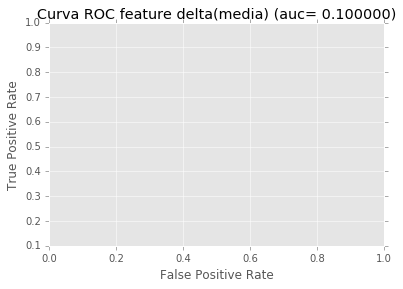

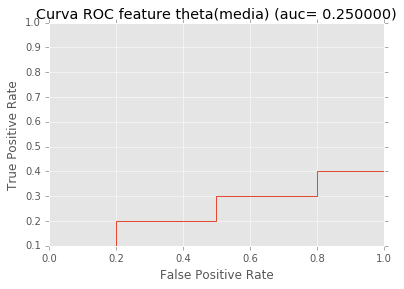

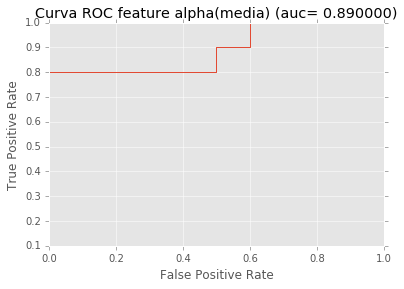

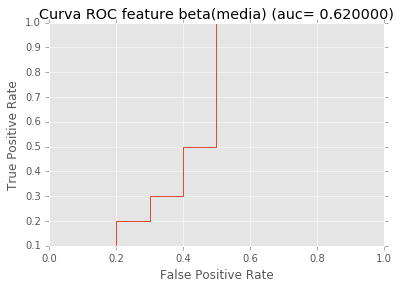

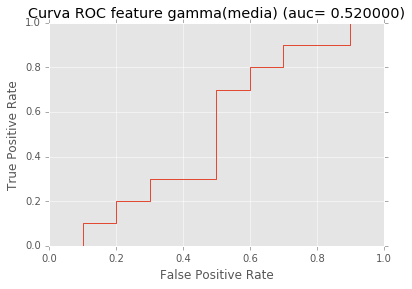

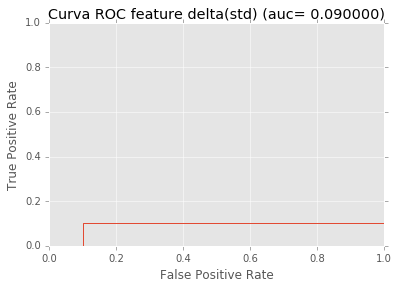

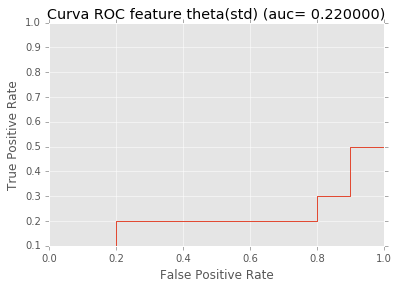

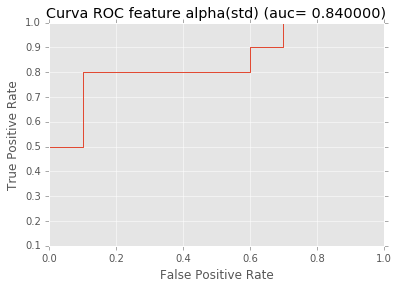

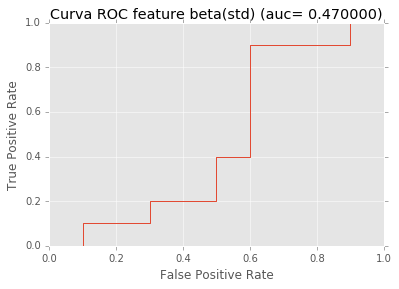

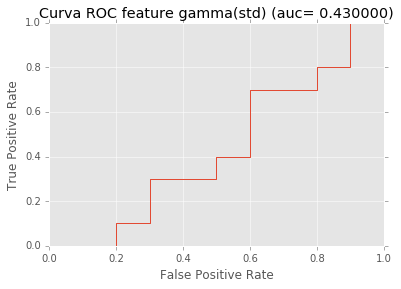

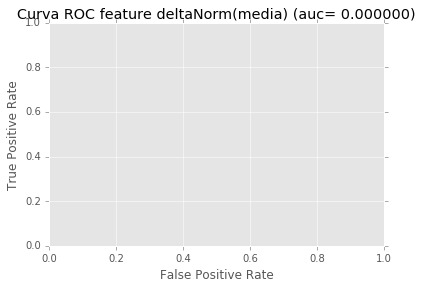

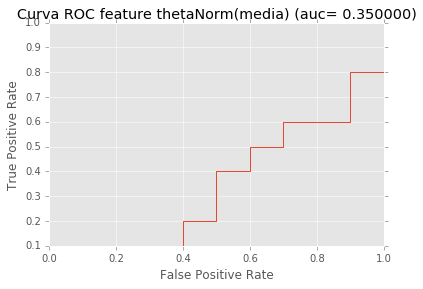

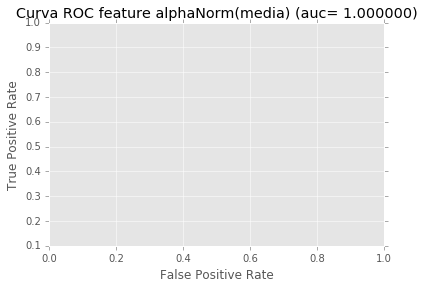

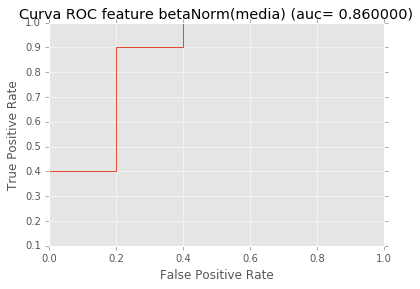

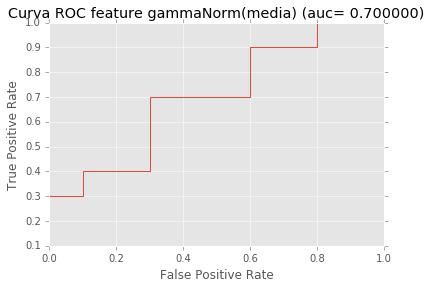

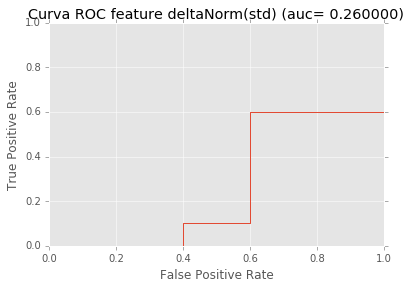

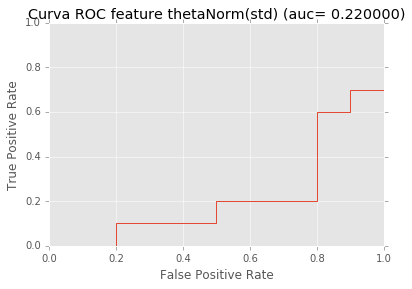

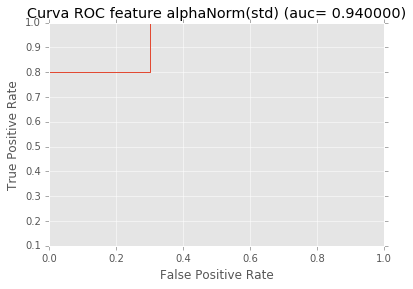

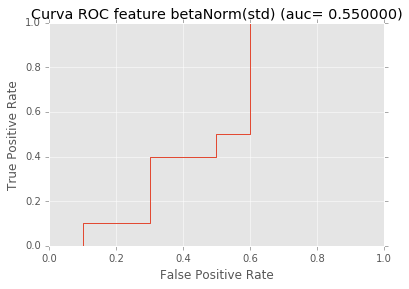

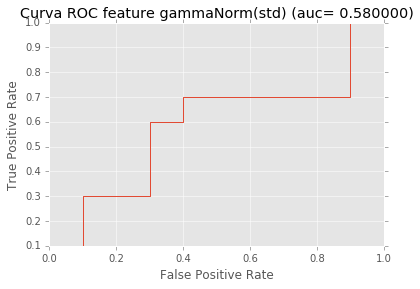

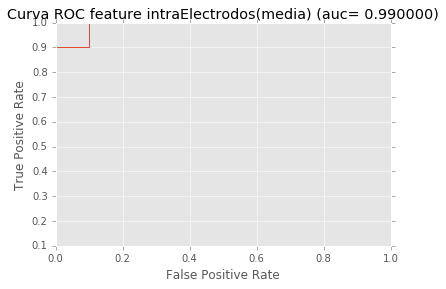

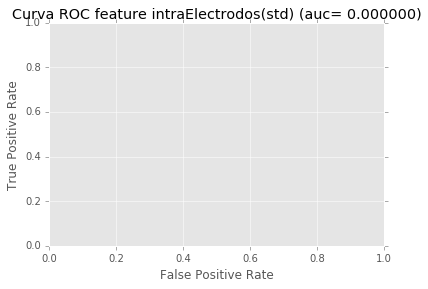

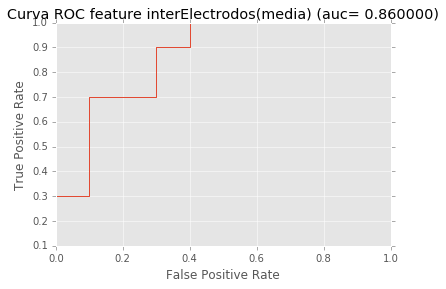

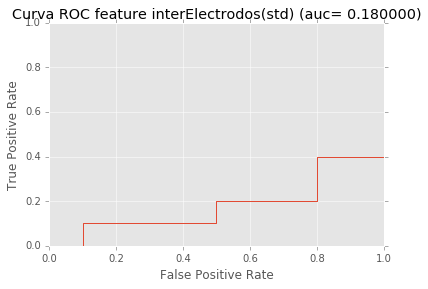

In [23]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc

target1 = np.zeros(10)
target2 = np.ones(10)
target = np.concatenate((target1, target2), axis=0)

aucPorFeature = {}

for f in xrange(0,24):
    fpr, tpr, thresholds = roc_curve(target,  features[:,f]) # obtener la curva ROC
    plt.figure()
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    area = auc(fpr, tpr)
    featureName = getFeatureName(f)
    plt.title("Curva ROC feature %s (auc= %f)" % (featureName,area))
    plt.plot(fpr,tpr) # plotear curva ROC
    aucPorFeature[featureName] = area

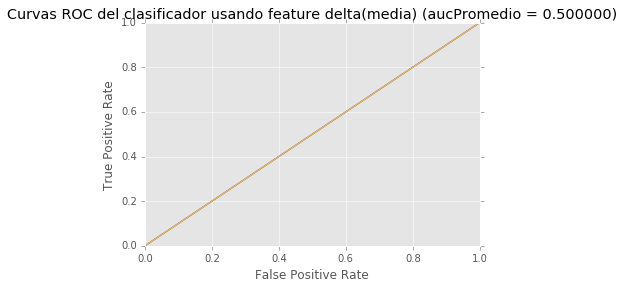

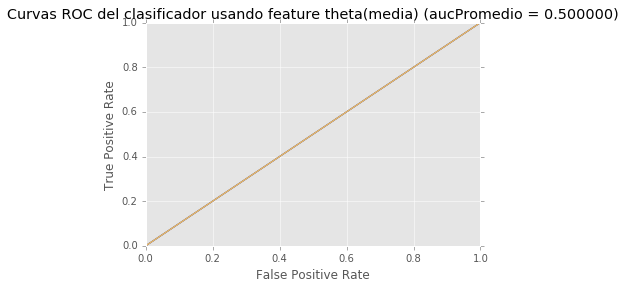

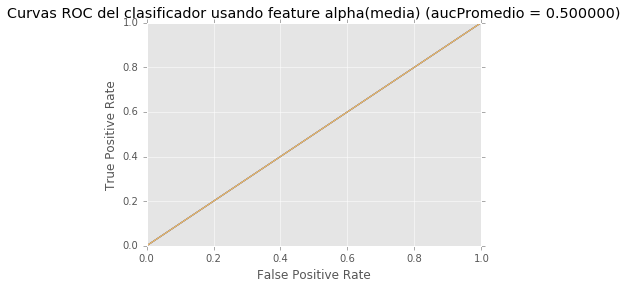

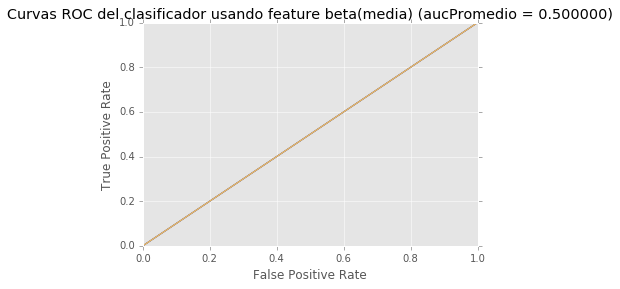

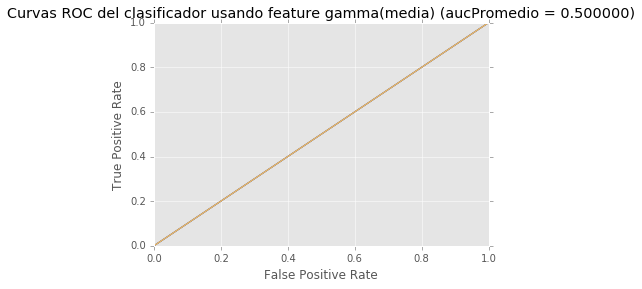

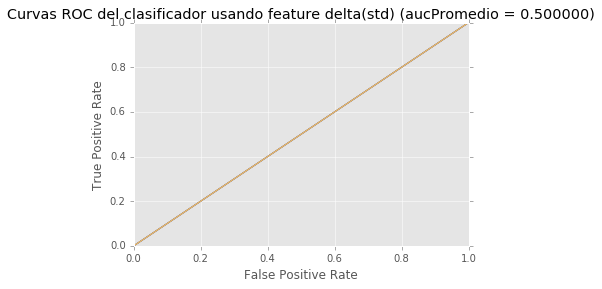

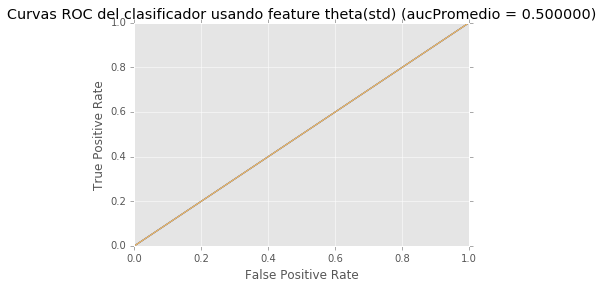

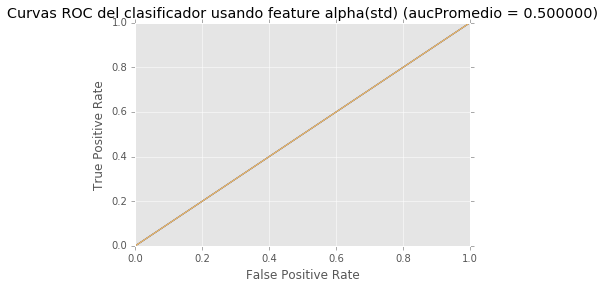

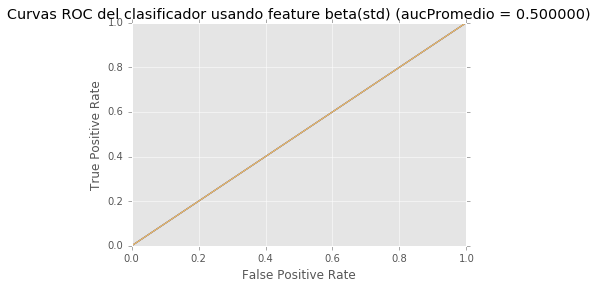

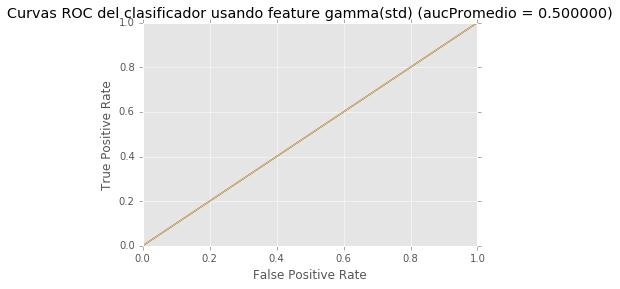

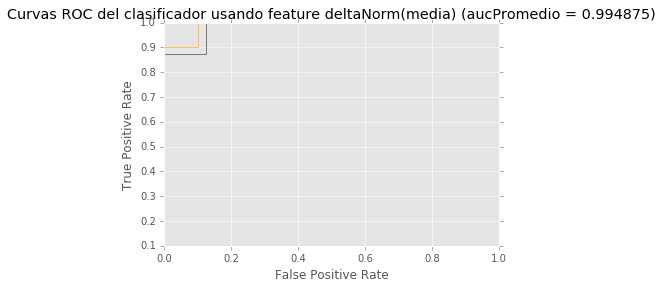

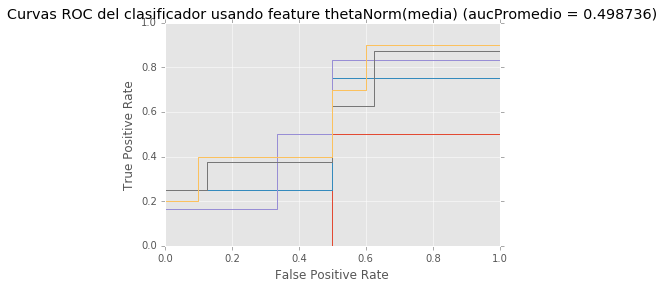

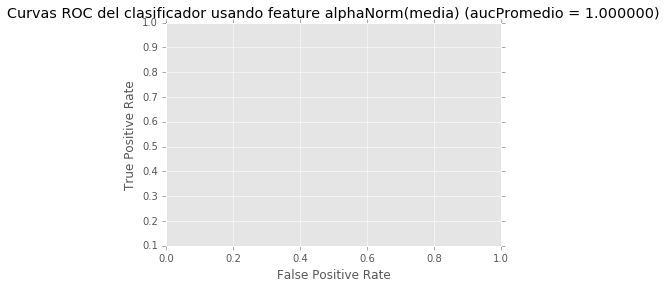

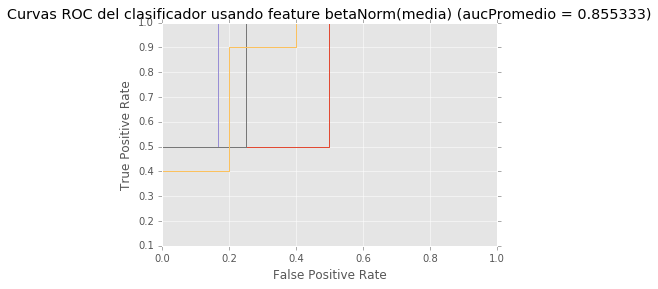

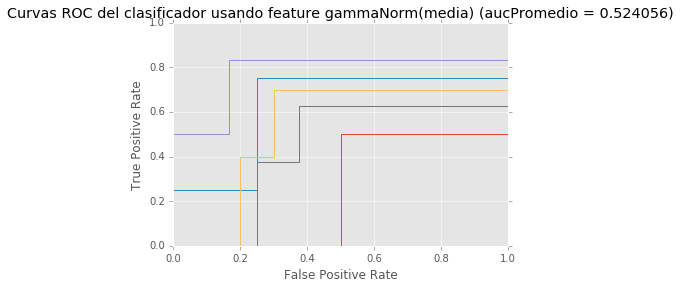

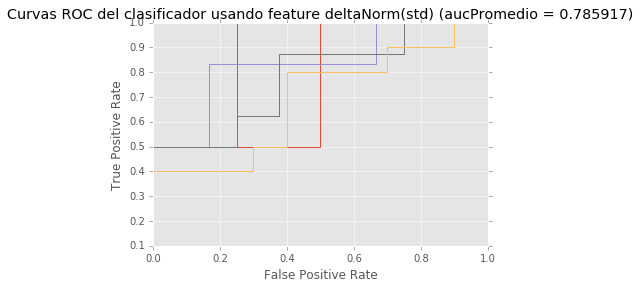

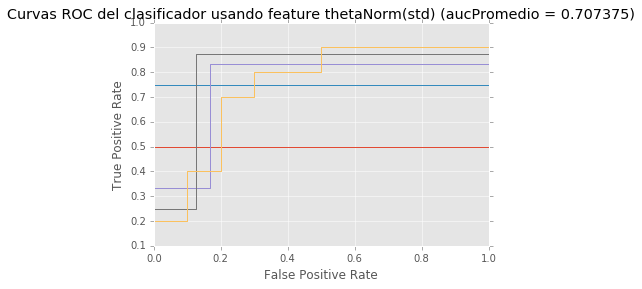

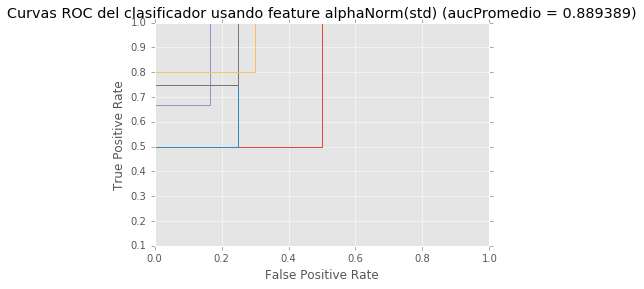

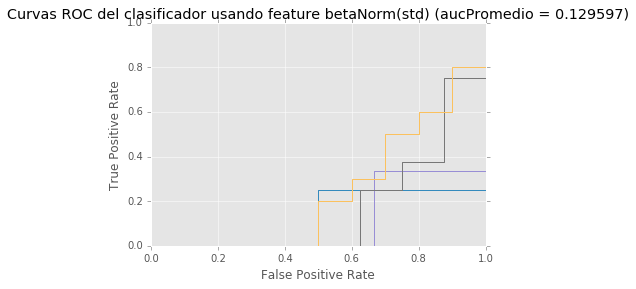

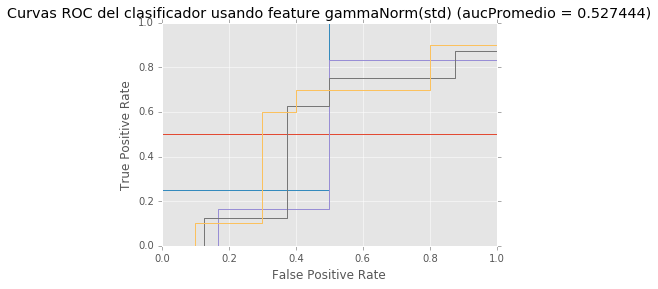

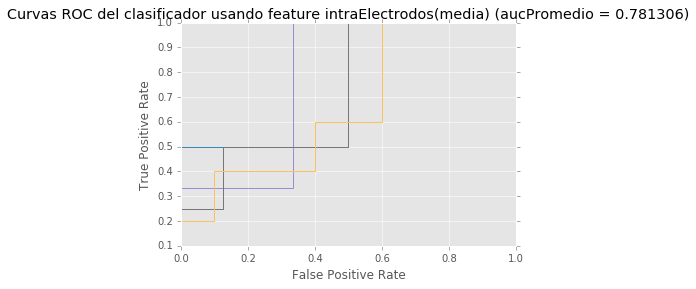

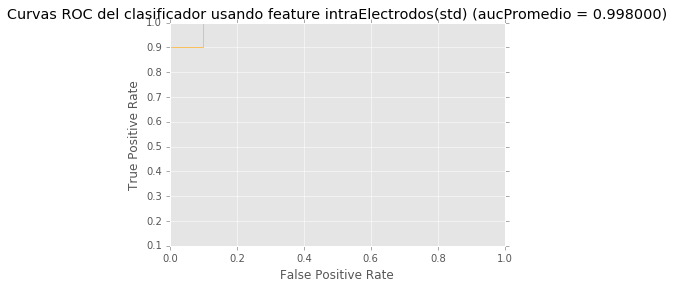

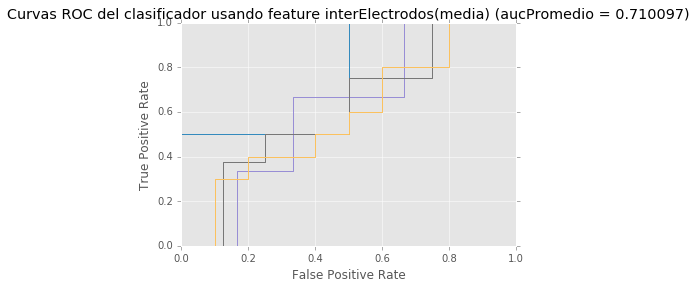

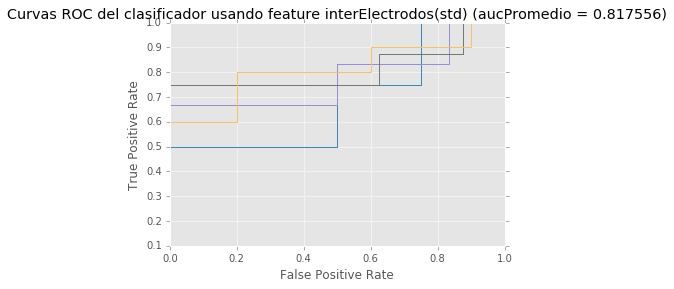

In [24]:
from sklearn.model_selection import StratifiedKFold
from sklearn import  linear_model

n_folds = 5
aucPorFeature = {}

for f in xrange(0,24):
    featureName = getFeatureName(f)
    plt.figure()
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    areaPromedio = 0
    X = np.array(features[:,f]) # array de features
    y = np.array(target) # labels

    cv = StratifiedKFold(n_splits=n_folds, shuffle=True)

    cv_target = np.array([])
    cv_prediction = np.array([])
    cv_probas = np.array([])

    for train_index, test_index in cv.split(X, y):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        X_train = X_train.reshape(-1, 1)
        X_test = X_test.reshape(-1, 1)

        clf = linear_model.LogisticRegression()
        clf = clf.fit(X_train,y_train)

        preds = clf.predict(X_test)
        probas = clf.predict_proba(X_test)

        cv_target = np.concatenate((cv_target, y_test), axis=0) # concatenar los resultados
        cv_prediction = np.concatenate((cv_prediction, preds), axis=0)
        cv_probas = np.concatenate((cv_probas, probas[:,1]), axis=0)

        preds_thr = np.zeros(len(cv_target))
        preds_thr[np.where(cv_probas>0.5)[0]] = 1
        cm = confusion_matrix(cv_target, preds_thr).astype(float)
        cm[0,:] = cm[0,:]/float(sum(cm[0,:])) # obtener matriz de confusion normalizada
        cm[1,:] = cm[1,:]/float(sum(cm[1,:]))

        fpr, tpr, thresholds = roc_curve(cv_target,  cv_probas) # obtener la curva ROC
        area = auc(fpr, tpr)
        areaPromedio = areaPromedio + area
        plt.plot(fpr,tpr) # plotear curva ROC
    areaPromedio = areaPromedio / n_folds
    aucPorFeature[featureName] = areaPromedio
    plt.title("Curvas ROC del clasificador usando feature %s (aucPromedio = %f)" % (featureName, areaPromedio))

En lo que respecta a los features normalizados, en el caso de la curva roc de la Regresión Logística
se obtienen los mejores resultados. 

Esto es debido a que un feature en particular no normalizado, puede comportarse bastante mal en el caso de que
no se encuentre con una distribución que se asemeje a una Gaussiana.

Muchos clasificadores con su función kernel toman a estos features como valores centrados en el 0
y con una varianza del mismo estilo. 

Ejercicio 2. SVM
En el siguiente ejercicio se entrenará un clasificador basado en SVM

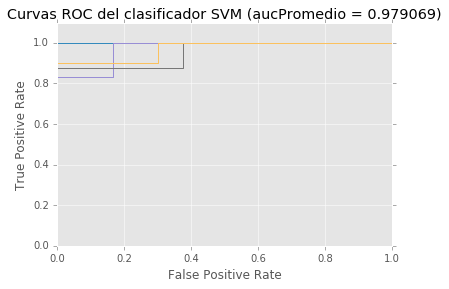

In [30]:
from sklearn import svm
from sklearn.metrics import roc_curve, auc

aucPromedio = 0
X = np.array(features) # features
y = np.array(target) # labels

n_folds = 5
cv = StratifiedKFold(n_splits=n_folds, shuffle=True)
cv_target = np.array([])
cv_prediction = np.array([])
cv_probas = np.array([])

plt.figure()
plt.ylim(ymax=1.1)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

for train_index, test_index in cv.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    clf = svm.SVC(kernel='linear', C=1.0, probability=True)
    clf = clf.fit(X_train,y_train)

    preds = clf.predict(X_test)
    probas = clf.predict_proba(X_test)

    cv_target = np.concatenate((cv_target, y_test), axis=0) # concatenar los resultados
    cv_prediction = np.concatenate((cv_prediction, preds), axis=0)
    cv_probas = np.concatenate((cv_probas, probas[:,1]), axis=0)

    preds_thr = np.zeros(len(cv_target))
    preds_thr[np.where(cv_probas>0.5)[0]] = 1
    cm = confusion_matrix(cv_target, preds_thr).astype(float)
    cm[0,:] = cm[0,:]/float(sum(cm[0,:])) # obtener matriz de confusion normalizada
    cm[1,:] = cm[1,:]/float(sum(cm[1,:]))

    fpr, tpr, thresholds = roc_curve(cv_target,  cv_probas) # obtener la curva ROC
    area = auc(fpr, tpr)
    aucPromedio = aucPromedio + area
    plt.plot(fpr,tpr) # plotear curva ROC

aucPromedio = aucPromedio / n_folds
plt.title("Curvas ROC del clasificador SVM (aucPromedio = %f)" % aucPromedio)
plt.show()

Ejercicio 2 b.
En el siguiente punto utilizaremos pipeline de Scikit-Learn para computar las 3 técnicas que nos pide el enunciado.



/usr/local/lib/python2.7/dist-packages/sklearn/metrics/ranking.py:542: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


             precision    recall  f1-score   support

        0.0       0.75      1.00      0.86         3
        1.0       1.00      0.50      0.67         2

avg / total       0.85      0.80      0.78         5



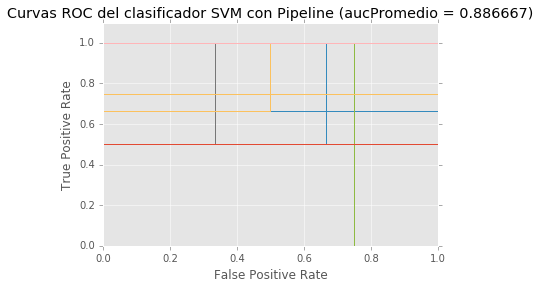

In [27]:
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectPercentile
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import math

plt.figure()
plt.ylim(ymax=1.1)
aucPromedio = 0
niters = 100

for i in xrange (1,niters):
    X = np.array(features) # features
    y = np.array(target) # labels
    X_train, X_test, y_train, y_test = train_test_split(X, y)

    featureSelection = SelectPercentile(percentile=10)
    clf = svm.SVC(kernel='linear', probability=True)
    pipeline = make_pipeline(StandardScaler(), featureSelection, clf)

    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    probas = pipeline.predict_proba(X_test)
    y_probas = probas[:,1]

    fpr, tpr, thresholds = roc_curve(y_test,  y_probas) # obtener la curva ROC
    aucPipeline = auc(fpr, tpr)
    if (not math.isnan(aucPipeline)):
        aucPromedio = aucPipeline + aucPromedio
    plt.plot(fpr,tpr) # plotear curva ROC

print(classification_report(y_test, y_pred))
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Curvas ROC del clasificador SVM con Pipeline (aucPromedio = %f)" % (aucPromedio/niters))
plt.show()

Probamos utilizando un 20% de los features, para poder ver como varía el área de la curva Roc.

             precision    recall  f1-score   support

        0.0       0.50      1.00      0.67         2
        1.0       1.00      0.33      0.50         3

avg / total       0.80      0.60      0.57         5



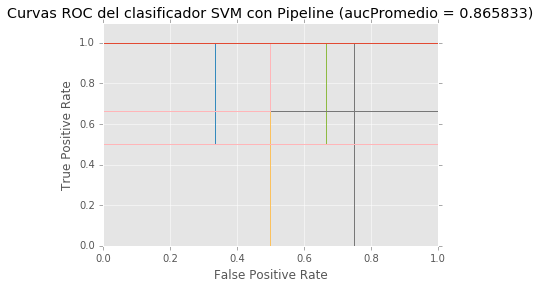

In [29]:
from sklearn import svm
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectPercentile
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import math
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.signal as sps
import scipy.io as sio
%matplotlib inline
matplotlib.style.use('ggplot')


plt.figure()
plt.ylim(ymax=1.1)
aucPromedio = 0
niters = 100


for i in xrange (1,niters):
    X = np.array(features) # features
    y = np.array(target) # labels
    X_train, X_test, y_train, y_test = train_test_split(X, y)

    featureSelection = SelectPercentile(percentile=20)
    clf = svm.SVC(kernel='linear', probability=True)
    pipeline = make_pipeline(StandardScaler(), featureSelection, clf)

    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    probas = pipeline.predict_proba(X_test)
    y_probas = probas[:,1]
       
    
    fpr, tpr, thresholds = roc_curve(y_test,  y_probas) # obtener la curva ROC
    aucPipeline = auc(fpr, tpr)
    if (not math.isnan(aucPipeline)):
        aucPromedio = aucPipeline + aucPromedio
    plt.plot(fpr,tpr) # plotear curva ROC

print(classification_report(y_test, y_pred))
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Curvas ROC del clasificador SVM con Pipeline (aucPromedio = %f)" % (aucPromedio/niters))
plt.show()

Probamos con el 35 %

             precision    recall  f1-score   support

        0.0       0.50      1.00      0.67         1
        1.0       1.00      0.75      0.86         4

avg / total       0.90      0.80      0.82         5



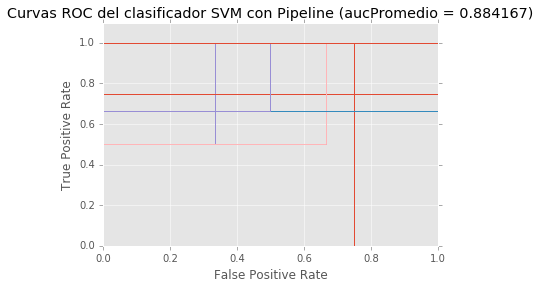

In [32]:

plt.figure()
plt.ylim(ymax=1.1)
aucPromedio = 0
niters = 100


for i in xrange (1,niters):
    X = np.array(features) # features
    y = np.array(target) # labels
    X_train, X_test, y_train, y_test = train_test_split(X, y)

    featureSelection = SelectPercentile(percentile=35)
    clf = svm.SVC(kernel='linear', probability=True)
    pipeline = make_pipeline(StandardScaler(), featureSelection, clf)

    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    probas = pipeline.predict_proba(X_test)
    y_probas = probas[:,1]
       
    
    fpr, tpr, thresholds = roc_curve(y_test,  y_probas) # obtener la curva ROC
    aucPipeline = auc(fpr, tpr)
    if (not math.isnan(aucPipeline)):
        aucPromedio = aucPipeline + aucPromedio
    plt.plot(fpr,tpr) # plotear curva ROC

print(classification_report(y_test, y_pred))
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Curvas ROC del clasificador SVM con Pipeline (aucPromedio = %f)" % (aucPromedio/niters))
plt.show()
